- Team Member: <br>
Jiayue Chen, USC ID: 1010470489<br>
Zhengan Pan, USC ID: 3134818448<br>
Jiahe Zhang, USC ID: 4321317535<br>

- Kaggle Project Name: Don't Overfit!II
- Kaggle Score: 0.903
- Kaggle Team Name : ABCCC
- Date of uploading result: 12/10/2019
- Section: Wednesday

### Larger dataset for test set but extremely small dataset for the trainning set.
In this project, we have 250 rows of data with 300 features as our train set but 19.8k rows of data for our test set. Thus, we need to find a way to avoid overfitting and try to pull up the accuracy rate of predicting the target value for the test set.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
from xgboost import XGBClassifier

In [6]:
from sklearn.feature_selection import SelectFromModel

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.preprocessing import StandardScaler

# Retrieving the trainning data.

In [13]:
trainset = pd.read_csv('train.csv')

In [14]:
trainset.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [15]:
y = trainset['target']

In [16]:
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

In [17]:
X = trainset.drop(columns = ['target', 'id'])

In [18]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


#### Randomly split the trainning set into new train set and test set to test the models

In [14]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)

In [15]:
X_train.shape

(200, 300)

In [16]:
X_test.shape

(50, 300)

# Using XGBoosting and select the most important features

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [18]:
from xgboost import XGBClassifier

In [19]:
XGBmodel = XGBClassifier(n_estimators = 100, learning_rate = 0.10)
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### Using XGBmodel to find the critical features (whose importance is not equal to 0 )

In [20]:
acc_train_XGB = round(100*XGBmodel.score(X_train,y_train),2)
acc_train_XGB

100.0

In [21]:
acc_test_XGB = round(100*XGBmodel.score(X_test,y_test),2)
acc_test_XGB

68.0

we can see that XGB model is still overfitting since the test score is only 68.0 while the train score is 100.

In [22]:
importance = XGBmodel.feature_importances_*100

In [23]:
importances = pd.DataFrame({'Importance':importance}, index = X_train.columns)
importances[:5]

,Importance
0,0.540294
1,0.462361
2,0.000000
3,0.260296
4,0.992477


In [24]:
thresholds = importances.sort_values(by='Importance', axis = 0, ascending = True)
thresholds[-6:-1]

,Importance
215,2.104079
119,2.118968
266,2.167058
287,2.251271
222,2.556155


As we can see that these are 5 most important features gotten by XGB model.

In [25]:
selected_features = thresholds.loc[~(thresholds<=0.5).all(axis=1)]
selected_features.shape

(73, 1)


For the features whose importance is less than 0.5, we just ignore these features and only use other features
to build the model

In [26]:
selected_features.head()

,Importance
259,0.501513
241,0.503999
127,0.516164
0,0.540294
165,0.541194


In [27]:
indexarray = selected_features.index

In [28]:
indexlist = []
for i in indexarray:
    temp = int(i)
    indexlist.append(temp)

In [29]:
indexlist[:5]

[259, 241, 127, 0, 165]

In [30]:
selected_X_train = X_train.iloc[:, indexlist]
selected_X_test = X_test.iloc[:,indexlist]

We created a new train and test set only use the selected features.

And then we fit the XGB model with the selected features

In [31]:
XGBmodel_new = XGBClassifier(n_estimators = 600, learning_rate = 0.10)
XGBmodel_new.fit(selected_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
acc_train_XGB_new = round(100*XGBmodel_new.score(selected_X_train,y_train),2)
acc_train_XGB_new

100.0

In [33]:
acc_test_XGB_new = round(100*XGBmodel_new.score(selected_X_test,y_test),2)
acc_test_XGB_new

66.0

After using the selected features as our predictors, we still overfit the model and get lower accuracy rate for
the test set.

So maybe we should try other methods and models to find out which features we should choose as our predictors
rater than XGBmodels.

# Using Shap and XGBoost model to select the features

In [34]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [35]:
import shap

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

In [37]:
modelg =  XGBClassifier(n_estimators=1000, learning_rate=0.1,max_depth = 2)

In [38]:
modelg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
explainer = shap.TreeExplainer(modelg, X_train)

In [40]:
shap_values = explainer.shap_values(X_train)

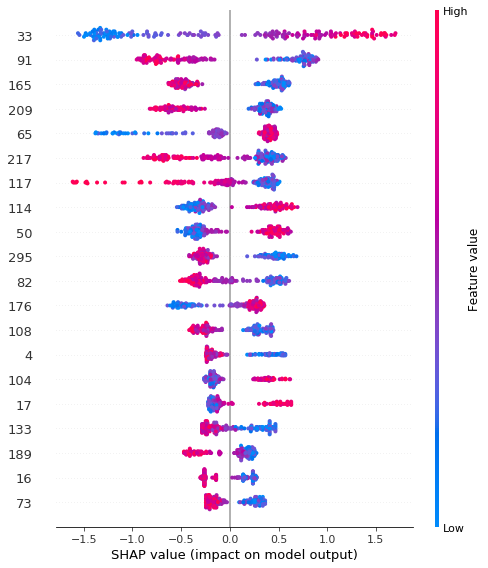

In [41]:
shap.summary_plot(shap_values, X_train)

In [42]:
Xs_train = X_train[['33','91','165','209','65','217','117','114','50','295','82','176','108','4','104','17','133','189','16','73']]

In [43]:
Xs_test = X_test[['33','91','165','209','65','217','117','114','50','295','82','176','108','4','104','17','133','189','16','73']]

In [44]:
scaler = StandardScaler()

In [45]:
Xs_train_trans = scaler.fit_transform(Xs_train)
Xs_test_trans = scaler.transform(Xs_test)

### tuning parameters for XBGoost

In [46]:
param_dist = {
        'n_estimators':[500,1000,1500,2000],
        'learning_rate':[0.001,0.01,0.1,1],
        'max_depth':[1,2,3]
        }

In [47]:
grid = GridSearchCV(XGBClassifier(),param_dist,cv = 10,scoring = 'neg_log_loss')

In [48]:
grid.fit(Xs_train_trans,y_train)

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [500, 1000,

In [49]:
best_estimator1 = grid.best_params_
print(best_estimator1)

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}


In [50]:
modelgs =  XGBClassifier(n_estimators=500, learning_rate=0.1,max_depth = 1)

In [51]:
modelgs.fit(Xs_train_trans,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
preds = modelgs.predict(Xs_test_trans)

In [53]:
accuracy2 = round(modelgs.score(Xs_test_trans,y_test)*100,2)

In [54]:
accuracy2

74.0

In [55]:
accuracy3 = round(modelgs.score(Xs_train_trans,y_train)*100,2)

In [56]:
accuracy3

100.0

Although the accuracy rate for test set has been improved a little, it still overfits and have a low test accuracy

# Using Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestClassifier

### feature selection using shap

In [58]:
modelR =  RandomForestClassifier(n_estimators=3000,max_depth = 3,random_state = 42)

In [59]:
modelR.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [60]:
explainer = shap.TreeExplainer(modelR, X_train)

In [61]:
shap_values = explainer.shap_values(X_train)

 98%|===================| 394/400 [00:31<00:00]        

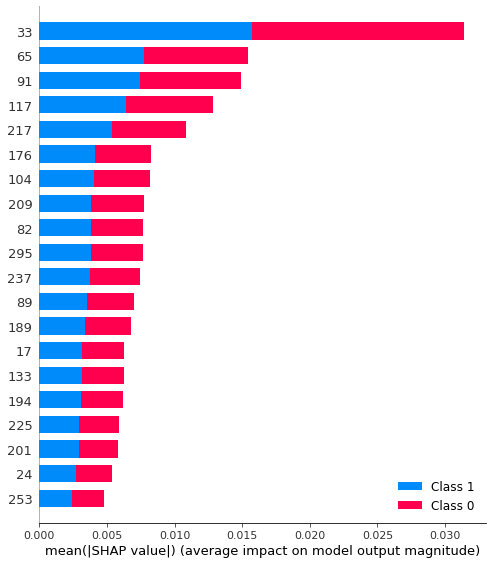

In [62]:
shap.summary_plot(shap_values, X_train)

#### Doing feature selection and scaling 

In [63]:
Xs_trainR = X_train[['33','65','91','117','217','176','104','209','82','295','237','89','189','17','133','194','225','201','24','253']]
Xs_testR = X_test[['33','65','91','117','217','176','104','209','82','295','237','89','189','17','133','194','225','201','24','253']]
Xs_train_transR = scaler.fit_transform(Xs_trainR)
Xs_test_transR = scaler.transform(Xs_testR)

#### Tuining parameters for getting better results

In [64]:
param_distRs = {'n_estimators': [500,1000,1500,2000],
                       'max_depth':[None,1,2,3]
              }

In [65]:
gridRs = GridSearchCV(RandomForestClassifier(), param_grid=param_distRs, cv=10, scoring='roc_auc', n_jobs=-1)

In [66]:
gridRs.fit(Xs_train_transR, y_train)

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [67]:
best_estimatorR = gridRs.best_params_
print(best_estimatorR)

{'max_depth': None, 'n_estimators': 1000}


Fit model and get accuracy score

In [68]:
modelRs = RandomForestClassifier(n_estimators=1500, max_depth = None)

In [69]:
modelRs.fit(Xs_train_transR,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
predsR = modelRs.predict(Xs_test_transR)

In [71]:
accuracy2R = round(modelRs.score(Xs_test_transR,y_test)*100,2)
accuracy2R

78.0

In [72]:
accuracy3R = round(modelRs.score(Xs_train_transR,y_train)*100,2)
accuracy3R

100.0

We got a decent test score but the train score is still 100, which indicates we are still overfitting the model

# Building SVC Model

In [73]:
from sklearn.svm import SVC

In [74]:
modelV =  SVC(C = 1,kernel = 'linear')

In [75]:
modelV.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Using Shap to select features

In [76]:
explainer = shap.LinearExplainer(modelV, X_train)

In [77]:
shap_values = explainer.shap_values(X_train)

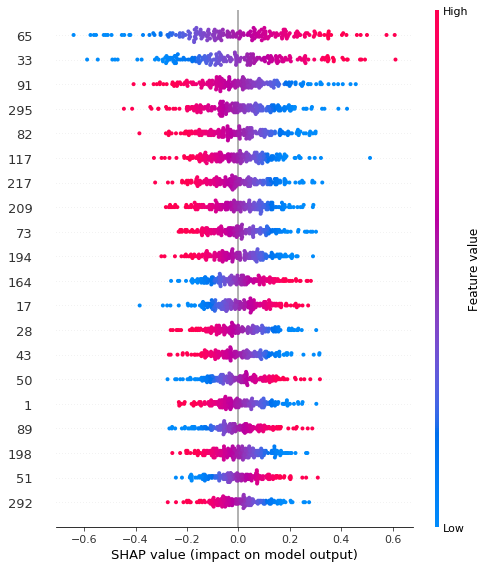

In [78]:
shap.summary_plot(shap_values, X_train)

In [79]:
# Scaling and select features

In [80]:
Xs_trainV = X_train[['33','65','91','295','82','117','209','217','73','194','164','17','28','43','50','1','89','198','51','292']]
Xs_testV = X_test[['33','65','91','295','82','117','209','217','73','194','164','17','28','43','50','1','89','198','51','292']]
Xs_train_transV = scaler.transform(Xs_trainV)
Xs_test_transV = scaler.transform(Xs_testV)

#### Tuning the model to improve the accuracy rate 

In [81]:
param_distV = {'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                  'kernel': ['linear', 'poly', 'rbf'],
                 }

In [82]:
svc = SVC(probability=True, gamma='scale')

In [83]:
gridV = GridSearchCV(svc, param_grid=param_distV, cv=10, scoring='roc_auc', n_jobs=-1)

In [84]:
gridV.fit(Xs_train_transV, y_train)

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [85]:
best_estimatorV = gridV.best_params_
print(best_estimatorV)

{'C': 0.1, 'kernel': 'linear'}


In [86]:
# Fit model and get accuracy score

In [87]:
modelVs = SVC(C = 0.1,kernel = 'linear')

In [88]:
modelVs.fit(Xs_train_transV,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [89]:
predsV = modelVs.predict(Xs_test_transV)

In [90]:
accuracy2V = round(modelVs.score(Xs_test_transV,y_test)*100,2)
accuracy2V

72.0

In [91]:
accuracy3V = round(modelVs.score(Xs_train_transV,y_train)*100,2)
accuracy3V

84.5

As a result, we can see that even though our model is not overfitting, the test score for SVC model is pretty low

# Building SGD Model

In [92]:
from sklearn.linear_model import SGDClassifier

In [93]:
sgd = SGDClassifier(eta0=1, max_iter=1000, tol=0.0001)

In [94]:
modelG =  SGDClassifier(eta0=1, tol=0.0001, alpha = 0.01, l1_ratio = 1.0, learning_rate='adaptive',loss='log',penalty='elasticnet',random_state = 42)

In [95]:
modelG.fit(X_train,y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=1.0, learning_rate='adaptive', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=42, shuffle=True, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#### feature selection using shap

In [96]:
explainer = shap.LinearExplainer(modelG, X_train)

In [97]:
shap_values = explainer.shap_values(X_train)

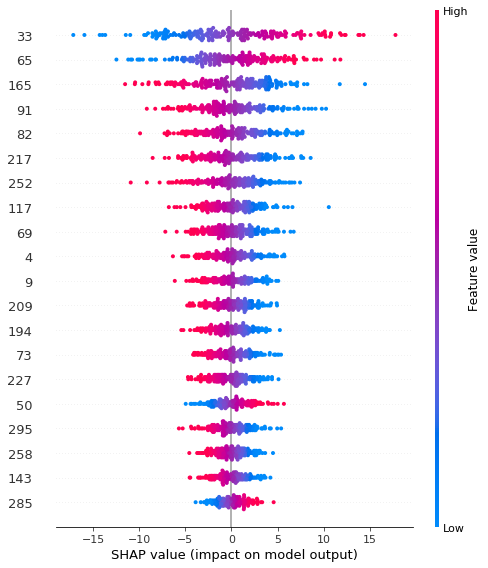

In [98]:
shap.summary_plot(shap_values, X_train)

In [99]:
# feature selection and scaling 

In [100]:
Xs_trainG = X_train[['33','65','165','91','82','217','252','117','69','4','9','209','194','73','227','50','295','258','143','285']]
Xs_testG = X_test[['33','65','165','91','82','217','252','117','69','4','9','209','194','73','227','50','295','258','143','285']]
Xs_train_transG = scaler.transform(Xs_trainG)
Xs_test_transG = scaler.transform(Xs_testG)

#### Tuning the model and get better accuracy

In [101]:
param_distG = {'loss': ['log', 'modified_huber'],
                  'penalty': ['l1', 'l2', 'elasticnet'],
                  'alpha': [0.001, 0.01],
                  'l1_ratio': [0, 0.15, 0.5, 1.0],
                  'learning_rate': ['optimal', 'invscaling', 'adaptive']
                 }

In [102]:
gridG = GridSearchCV(sgd, param_grid=param_distG, cv=10, scoring='roc_auc', n_jobs=-1)

In [103]:
gridG.fit(Xs_train_transG, y_train)

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=1, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True,
                                     tol=0.0001, validation_fraction=0.1,
                                     verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01],
                         'l1_ratio': [0, 0.15, 0.5, 1.0],
                         'learning_rate': ['optimal', 'invscaling', 'adaptive'],
             

In [104]:
best_estimatorGs = gridG.best_params_
print(best_estimatorGs)

{'alpha': 0.01, 'l1_ratio': 0, 'learning_rate': 'invscaling', 'loss': 'modified_huber', 'penalty': 'elasticnet'}


In [105]:
modelGs =  SGDClassifier(eta0=1, tol=0.0001, alpha = 0.01, l1_ratio = 1.0, learning_rate='invscaling',loss='modified_huber',penalty='l2')

In [106]:
modelGs.fit(Xs_train_transG,y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=1.0, learning_rate='invscaling', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [107]:
accuracyG2 = round(modelGs.score(Xs_test_transG,y_test)*100,2)
accuracyG2

74.0

In [108]:
accuracyG3 = round(modelGs.score(Xs_train_transG,y_train)*100,2)
accuracyG3

89.5

This SGD model looks decent, but still, the test score is too low for large test size

# Logsitc Regression and Tuning

In [109]:
!pip install eli5

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [111]:
import eli5

Using TensorFlow backend.


In [112]:
model_log = LogisticRegression(solver = 'lbfgs')

### Tuning the logistic model and try to find out the best C value to see if it helps avoid overfitting

In [113]:
kfold = StratifiedKFold(shuffle = True, random_state = 1, n_splits = 17)
param_grid_log = [{'C':np.linspace(0.001,1,1000)}]

In [114]:
grid_search_log = GridSearchCV(model_log,param_grid_log,scoring = 'neg_log_loss',cv=kfold)
grid_result_log = grid_search_log.fit(selected_X_train,y_train)

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.


In [115]:
grid_result_log.best_params_

{'C': 0.001}

The best C for the logistic model is 0.001

In [116]:
logreg = LogisticRegression(C = 0.001, solver = 'lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
acc_train_logreg = round(100*logreg.score(X_train,y_train),2)
acc_train_logreg

64.5

In [118]:
acc_test_logreg = round(100*logreg.score(X_test, y_test))
acc_test_logreg

62.0

We can see that both the train score and the test score are extremely low

### Now let's try to use KFold validation and see if we can avoid overfittng.

In [119]:
mspe = cross_val_score(logreg,X_train,y_train,cv = kfold)
mspe

array([0.61538462, 0.61538462, 0.61538462, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.63636364, 0.63636364, 0.63636364, 0.63636364, 0.63636364,
       0.63636364, 0.63636364])

In [120]:
mspe_list = []

In [121]:
for nsplits in range (2,21):
    mspe = (cross_val_score(logreg, X_train, y_train,cv = KFold(n_splits = nsplits, random_state = 42)))
    mspe_list.append(mspe.mean())

In [122]:
mspe_list

[0.645,
 0.645258555706317,
 0.645,
 0.645,
 0.6452762923351157,
 0.6453201970443351,
 0.645,
 0.644927536231884,
 0.645,
 0.644869750132908,
 0.6458333333333334,
 0.6455128205128204,
 0.6448979591836734,
 0.6454212454212453,
 0.6458333333333334,
 0.6466131907308378,
 0.6452020202020202,
 0.6464114832535884,
 0.6449999999999999]

In [123]:
optimal_nsplits = mspe_list.index(max(mspe_list)) + 2
optimal_nsplits

17

As we can see, the best n_splits for kfold is when n_splits = 17

### Next, try to use ELI5 for feature selectoin based on the Logistic Regerssion model 

In [124]:
eli5.show_weights(logreg, top=20)

Here, we only choose 20 features as our predictors and try to see if it helps avoid overfitting

In [125]:
X_train_eli = X_train.iloc[:, [33,65,89,30,226,272,82,16,73,39,4,189,133,194,209,217,117,295,91]]
X_test_eli = X_test.iloc[:, [33,65,89,30,226,272,82,16,73,39,4,189,133,194,209,217,117,295,91]]

In [126]:
X_train_eli.shape

(200, 19)

We build the new model only use top 19 features

In [127]:
logreg_new = LogisticRegression(solver = 'lbfgs', C = 0.001)
logreg_new.fit(X_train_eli, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
acc_train_logreg_new = round(100*logreg_new.score(X_train_eli,y_train),2)
acc_train_logreg_new

64.5

In [129]:
acc_test_logreg_new = round(100*logreg_new.score(X_test_eli,y_test),2)
acc_test_logreg_new

62.0

For Logistic Regression model, the test score is getting lower and thus ELI5 does not give us a 
good feature selection

# Neural Network

In [130]:
from keras.models import Sequential
from keras.layers import Dense

In [131]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [132]:
Xtrain_trans = scaler.transform(X_train)
Xtest_trans = scaler.transform(X_test)

In [133]:
NW = Sequential()
NW.add(Dense(64,activation = 'relu', input_shape=(300,)))
NW.add(Dense(64,activation = 'relu'))
NW.add(Dense(1))
NW.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
NW.fit(Xtrain_trans,y_train,epochs =10, batch_size = 1)

Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6009 - mae: 0.6404
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1227 - mae: 0.2695
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2198 - mae: 0.3722
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1136 - mae: 0.2696
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1285 - mae: 0.2868
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0945 - mae: 0.2417
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0815 - mae: 0.2329
Epoch 8/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0773 - mae: 0.2254
Epoch 9/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0738 - mae: 0.2246
Epoch 10/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0587 - mae: 0.1967


# LB probing

After trying these models, we think all of the models will overfit the trainning data. Thus, we decide to use another approach which excludes the models and directly predict the target value by getting the coefficients for each feature.

### Brief Introduction to LB Probing

To apply LB Probing to this kaggle project, we assume that each coefficient $a_i$ is independent to other coefficients. Then, since we have 300 features in this project, the target value will just be: 

$$\text{target} = \text{Heaviside}(a_0x_0+a_1x_1+...a_{298}x_{298}+a_{299}x_{299}+\text{noise})$$ 

But how would we get the coefficients for $a_i$?

Now, let's say we want the coefficient $a_{33}$ for the feature variable $x_{33}$. We just simply fill out the target value according to $x_{33}$. Since we have 19.8k rows of target value to predict, and we also have 19.8k rows of $x_{33}$ values in the test set, we just fill out the target value using $x_{33}$ values in the test set. For example:

    var = 33
    test = pd.read_csv('test.csv')
    sub = pd.read_csv('sample_submission.csv')
    sub['target'] = test[str(var)]
    sub.to_csv('submission'+str(var)+'.csv',index=False)
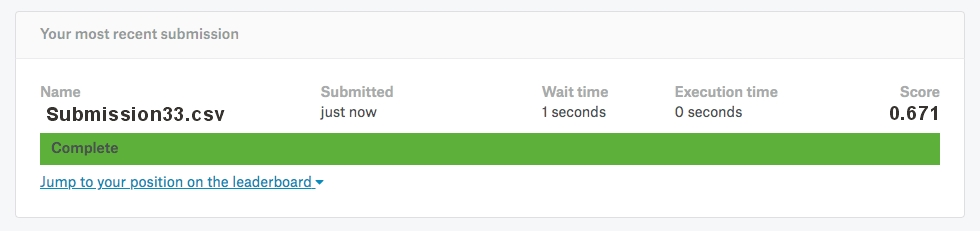



When we submit this result to kaggle, we will get the score for $x_{33}$ and the $a_{33}$ will just be 
$$a_{33} = \text{LB_SCORE}_{33} - 0.500 = 0.671 - 0.500 = 0.171 $$


A better way to calculate $a_{33}$ will be: 

$$a_{33} = \frac{8}{9} * \text{LB_SCORE}_{33} + \frac{1}{9} * \text{CV_SCORE}_{33} - 0.500 = \frac{8}{9} * 0.671 + \frac{1}{9}* 0.7317 - 0.500 = 0.171 $$



Therefore, we just need to get all 300 $a_i$ from the public LeaderBoard of Kaggle and we can avoid overfitting problem and get a decent target value using these coefficients. Fortunately, the first place solution has provided us with LB_SCORE for all 300 features.

In [9]:
dfLB = pd.read_csv('probed_aucs.csv')
dfLB[:5]

,variable,public_auc
0,X33,0.671
1,X65,0.671
2,X217,0.382
3,X67,0.501
4,X117,0.405


Thus, we can just utilize these LB_SCORE and easily calculate each coefficient $a_i$. But first, we also need to calculate the CV_SCORE using roc_auc_score

In [10]:
from sklearn.metrics import roc_auc_score

We first build the dataframe to store variables $x_i$, CV_score, diff and LB_score

In [11]:
df = pd.DataFrame({'var':np.arange(300),'CV':np.zeros(300),'diff':np.zeros(300),'LB':0.5*np.ones(300)})

In [19]:
for i in range(300):
    df.loc[i,'CV'] = roc_auc_score(trainset['target'],trainset[str(i)])
    df.loc[i,'diff'] = abs(df.loc[i,'CV']-0.5)

In [20]:
df.head()

,var,CV,diff,LB
0,0,0.560278,0.060278,0.5
1,1,0.468889,0.031111,0.5
2,2,0.514722,0.014722,0.5
3,3,0.501840,0.001840,0.5
4,4,0.432014,0.067986,0.5


We first calculate CV_SCORE using the target value in train_set, and get the difference by 
$$\text{Diff} = CV - 0.5$$
Then, we introduce the LB_SCORE from probed_aucs.csv file

In [21]:
for i in range(300):
    dfLB.iloc[i,0] = dfLB.iloc[i,0][1:]

In [22]:
for i in range(300):
    index = int(dfLB.iloc[i,0])
    df.loc[ df['var']==index, 'LB' ] = dfLB.iloc[i,1]

In [23]:
df.head()

,var,CV,diff,LB
0,0,0.560278,0.060278,0.500
1,1,0.468889,0.031111,0.484
2,2,0.514722,0.014722,0.508
3,3,0.501840,0.001840,0.500
4,4,0.432014,0.067986,0.516


Finally, we calculate the coefficient $a_i$ for each feature using the formula mentioned above

In [24]:
df['A'] = 0
df['A'] = (8/9)*df['LB'] + (1/9)*df['CV'] - 0.500
keep_threshold = 0.04 # YIELDS 15 NON-ZEROS A'S
df.loc[ abs(df['A'])<keep_threshold , 'A' ] = 0
df.sort_values('var',inplace=True)
for i in range(300):
    if df.loc[i,'LB'] != 0.500:    
        if(df.loc[i,'A'] != 0):
            print('A_'+str(i)+' = ',round(df.loc[i,'A'],6))

A_16 =  -0.0661
A_29 =  -0.044931
A_33 =  0.177745
A_45 =  -0.052594
A_63 =  -0.07363
A_65 =  0.170951
A_70 =  -0.059018
A_73 =  -0.104708
A_91 =  -0.117979
A_106 =  -0.042198
A_108 =  -0.044608
A_117 =  -0.098418
A_132 =  -0.044833
A_164 =  0.046188
A_189 =  -0.051302
A_199 =  0.111729
A_209 =  -0.07035
A_217 =  -0.119819
A_239 =  -0.045545


In [25]:
test = pd.read_csv('test.csv')

We try to calculate the predicted target value using the formula
$$\text{target} = \text{Heaviside}(a_0x_0+a_1x_1+...a_{298}x_{298}+a_{299}x_{299})$$ 


In [26]:
pred = test.iloc[:,1:].values.dot(df['A'].values)

In [27]:
pred.shape

(19750,)

In [28]:
sub = pd.read_csv('sample_submission.csv')

In [29]:
sub.target = pred

In [30]:
sub[:5]

,id,target
0,250,0.035338
1,251,-0.097590
2,252,0.314809
3,253,0.313386
4,254,-0.353095


In [31]:
sub.to_csv('submission.csv',index=False)

# Result
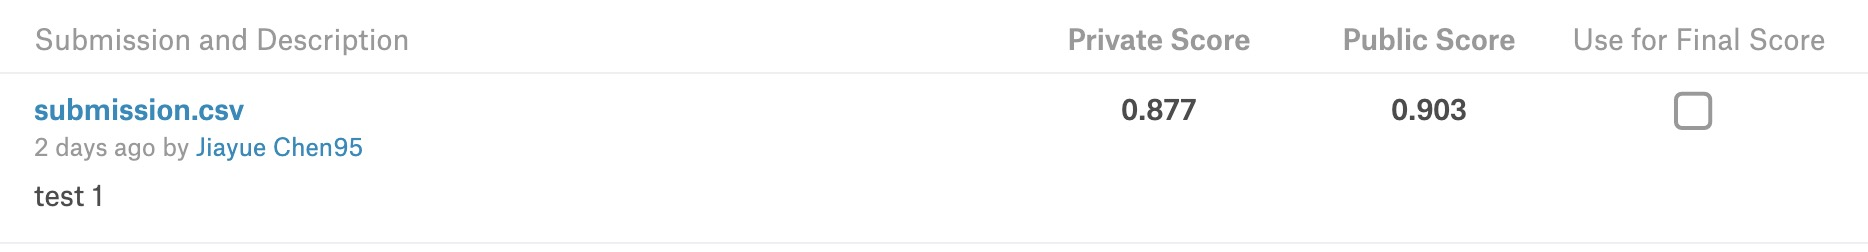
Using LB Probing made us get a pretty high public score on Kaggle LeaderBoard, which is 90.3